# Line Charts

## 3: Introduction To The Data

In [35]:
import pandas as pd
unrate = pd.read_csv('../data/unrate.csv')
unrate['DATE'] = pd.to_datetime(unrate['DATE'])
unrate.head() # VALUE: unemployment rate, in percent

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


## 7: Introduction To Matplotlib

In [5]:
import matplotlib.pyplot as plt

Using the different pyplot functions, we can create, customize, and display a plot. For example, we can use 2 functions to :

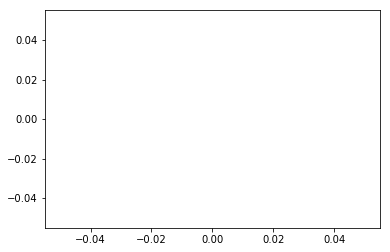

In [6]:
plt.plot()
plt.show()

## 8: Adding Data

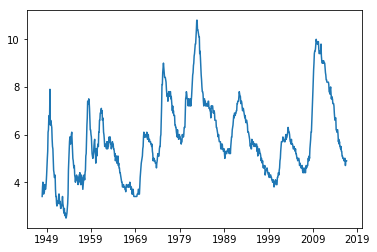

In [36]:
plt.plot(unrate['DATE'], unrate['VALUE']) # line
plt.show()

## 9: Fixing Axis Ticks

We can rotate the x-axis tick labels by 90 degrees so they don't overlap. The `xticks()` function within pyplot lets you customize the behavior of the x-axis ticks. If you head over to the [documentation for that function](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xticks), it's not immediately obvious the arguments it takes:

```
matplotlib.pyplot.xticks(*args, **kwargs)
```

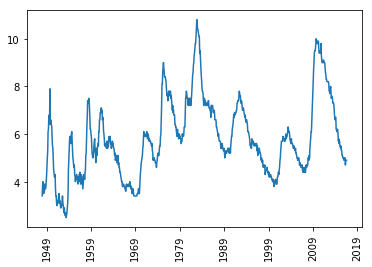

In [37]:
plt.plot(unrate['DATE'], unrate['VALUE'])
plt.xticks(rotation=90)
plt.show()

## 10: Adding Axis Labels And A Title

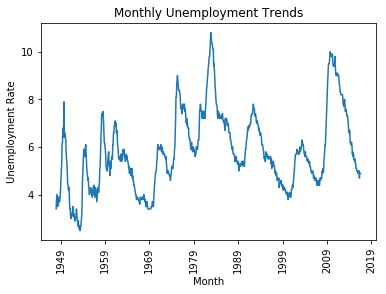

In [38]:
plt.plot(unrate['DATE'], unrate['VALUE'])
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')
plt.title('Monthly Unemployment Trends')
plt.show()

# Multiple plots

## 2: Matplotlib Classes

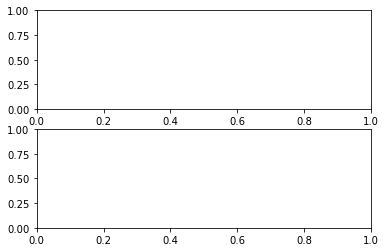

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
plt.show()

## 5: Adding Data

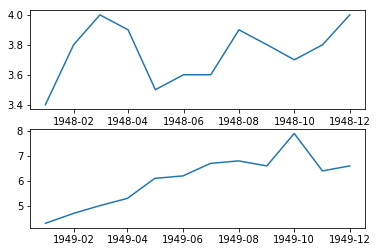

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(unrate[0:12]['DATE'], unrate[0:12]['VALUE'])
ax2.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'])

plt.show()

## 6: Formatting And Spacing

```python
fig = plt.figure(figsize=(width, height))
```

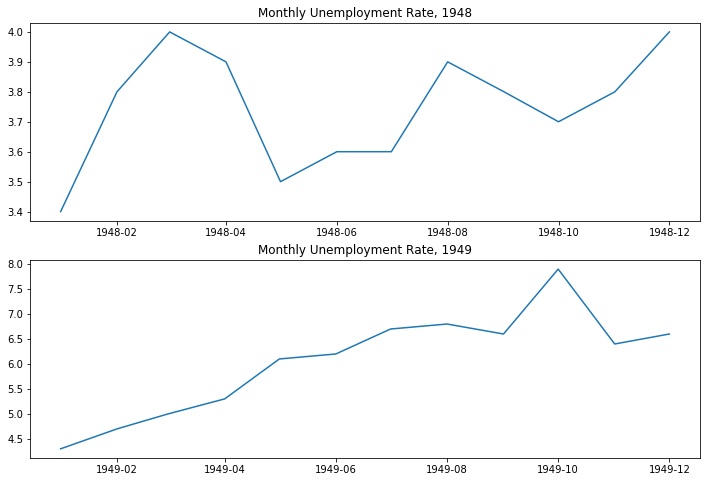

In [40]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(unrate[0:12]['DATE'], unrate[0:12]['VALUE'])
ax1.set_title('Monthly Unemployment Rate, 1948')
ax2.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'])
ax2.set_title('Monthly Unemployment Rate, 1949')
plt.show()

## 7: Comparing Across More Years

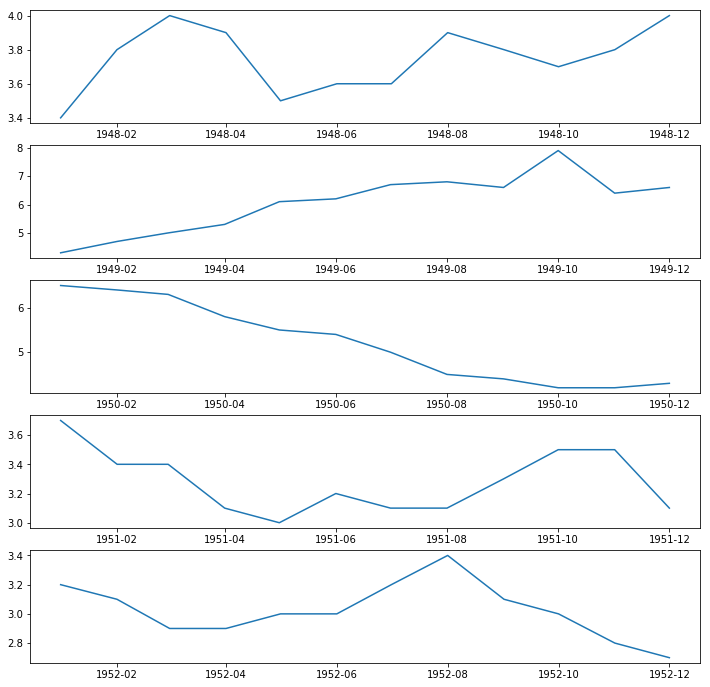

In [16]:
fig = plt.figure(figsize=(12,12))

for i in range(5):
    ax = fig.add_subplot(5,1,i+1)
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    ax.plot(subset['DATE'], subset['VALUE'])

plt.show()

## 8: Overlaying Line Charts

In [48]:
unrate['DATE'].dt.month.value_counts()

8     69
7     69
6     69
5     69
4     69
3     69
2     69
1     69
12    68
11    68
10    68
9     68
Name: DATE, dtype: int64

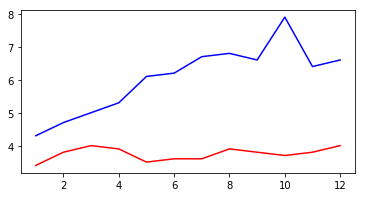

In [51]:
unrate['MONTH'] = unrate['DATE'].dt.month
fig = plt.figure(figsize=(6,3))

plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red')
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'], c='blue')

plt.show()

## 9: Adding More Lines

Let's visualize 5 years worth of unemployment rates on the same subplot.

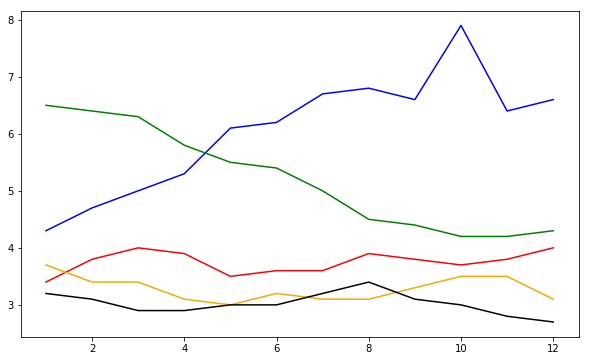

In [18]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i])
    
plt.show()

## 10: Adding A Legend

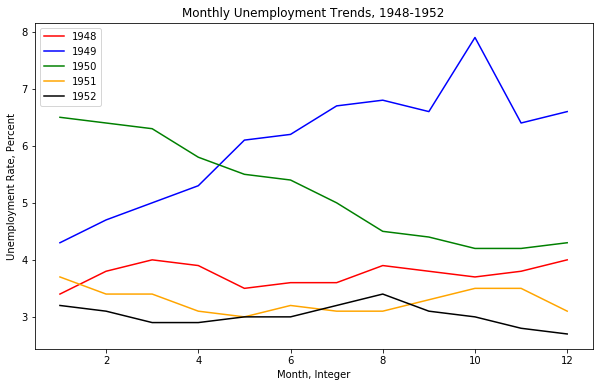

In [52]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    label = str(1948 + i) # new!
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=label)

plt.legend(loc='upper left') # new!
plt.xlabel('Month, Integer')
plt.ylabel('Unemployment Rate, Percent')
plt.title('Monthly Unemployment Trends, 1948-1952')

plt.show()

# Bar Plots And Scatter Plots

## 2: Introduction To The Data

- `FILM` - film name
- `RT_user_norm` - average user rating from Rotten Tomatoes, normalized to a 1 to 5 point scale
- `Metacritic_user_nom` - average user rating from Metacritc, normalized to a 1 to 5 point scale
- `IMDB_norm` - average user rating from IMDB, normalized to a 1 to 5 point scale
- `Fandango_Ratingvalue` - average user rating from Fandango, normalized to a 1 to 5 point scale
- `Fandango_Stars` - the rating displayed on the Fandango website (rounded to nearest star, 1 to 5 point scale)

In [53]:
reviews = pd.read_csv('../data/fandango_scores.csv')
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
norm_reviews = reviews[cols]
norm_reviews.head()

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue,Fandango_Stars
0,Avengers: Age of Ultron (2015),4.3,3.55,3.90,4.5,5.0
1,Cinderella (2015),4.0,3.75,3.55,4.5,5.0
2,Ant-Man (2015),4.5,4.05,3.90,4.5,5.0
3,Do You Believe? (2015),4.2,2.35,2.70,4.5,5.0
4,Hot Tub Time Machine 2 (2015),1.4,1.70,2.55,3.0,3.5


## 4: Creating Bars

We'll focus on positioning the bars on the x-axis in this step and on positioning the x-axis labels in the next step. We can generate a vertical bar plot using either [pyplot.bar()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar) or [Axes.bar()](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.bar). We'll use `Axes.bar()` so we can extensively customize the bar plot more easily. **We can use [pyplot.subplots()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots) to first generate a single subplot and return both the Figure and Axes object.** This is a shortcut from the technique we used in the previous mission:

```
fig, ax = plt.subplots()
```

The `Axes.bar()` method has 2 required parameters, `left` and `height`. We use the `left` parameter to specify the x coordinates of the left sides of the bar. We use the `height` parameter to specify the height of each bar. Both of these parameters accept a list-like object.

We can also use the `width` parameter to specify the width of each bar. This is an optional parameter and the width of each bar is set to `0.8` by default. The following code sets the `width` parameter to `0.5`.

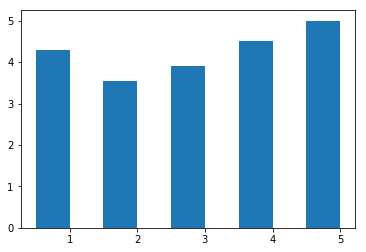

In [54]:
fig, ax = plt.subplots()
ax.bar(bar_positions, bar_heights, 0.5)
plt.show()

## 5: Aligning Axis Ticks And Labels

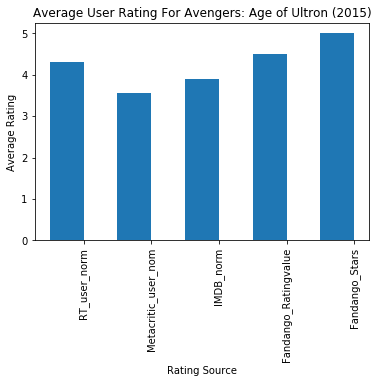

In [55]:
tick_positions = range(1,6)

fig, ax = plt.subplots()
ax.bar(bar_positions, bar_heights, 0.5)

ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols, rotation=90)

ax.set_xlabel('Rating Source')
ax.set_ylabel('Average Rating')
ax.set_title('Average User Rating For Avengers: Age of Ultron (2015)')
plt.show()

## 6: Horizontal Bar Plot

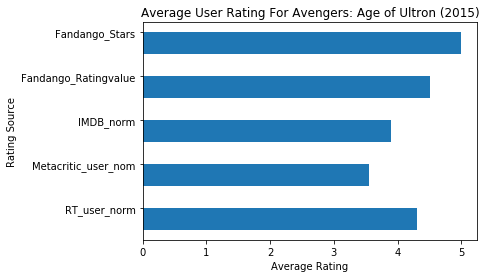

In [59]:
bar_widths = norm_reviews.loc[0, num_cols].values

fig, ax = plt.subplots()
ax.barh(bar_positions, bar_widths, 0.5) # new!

ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)
ax.set_ylabel('Rating Source')
ax.set_xlabel('Average Rating')
ax.set_title('Average User Rating For Avengers: Age of Ultron (2015)')
plt.show()

## 7: Scatter Plot

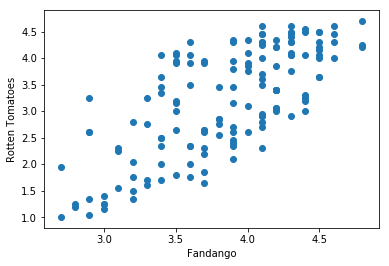

In [60]:
fig, ax = plt.subplots()
ax.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax.set_xlabel('Fandango')
ax.set_ylabel('Rotten Tomatoes')
plt.show()

## 8: Switching Axes

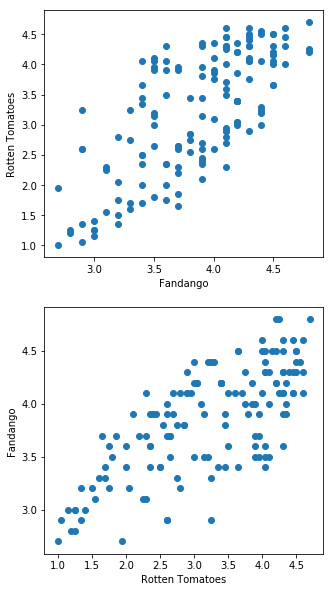

In [61]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')
ax2.scatter(norm_reviews['RT_user_norm'], norm_reviews['Fandango_Ratingvalue'])
ax2.set_xlabel('Rotten Tomatoes')
ax2.set_ylabel('Fandango')
plt.show()

## 9: Benchmarking Correlation

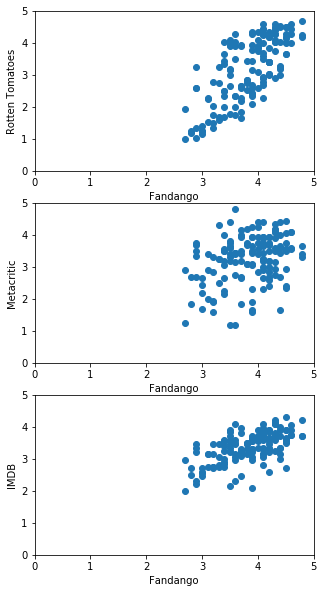

In [62]:
fig = plt.figure(figsize=(5,10))

ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 5)

ax2.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['Metacritic_user_nom'])
ax2.set_xlabel('Fandango')
ax2.set_ylabel('Metacritic')
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 5)

ax3.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['IMDB_norm'])
ax3.set_xlabel('Fandango')
ax3.set_ylabel('IMDB')
ax3.set_xlim(0, 5)
ax3.set_ylim(0, 5)

plt.show()

## 10: Next Steps

From the scatter plots, we can conclude that user ratings from IMDB and Fandango are the most similar. In addition, user ratings from Metacritic and Rotten Tomatoes have positive but weak correlations with user ratings from Fandango. We can also notice that user ratings from Metacritic and Rotten Tomatoes span a larger range of values than those from IMDB or Fandango. User ratings from Metacritic and Rotten Tomatoes range from 1 to 5. User ratings from Fandango range approximately from 2.5 to 5 while those from IMDB range approximately from 2 to 4.5.

# Histograms And Box Plots

## 2: Frequency Distribution

In [67]:
fandango_distribution = norm_reviews['Fandango_Ratingvalue'].value_counts()
fandango_distribution = fandango_distribution.sort_index()
fandango_distribution

2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: Fandango_Ratingvalue, dtype: int64

In [68]:
imdb_distribution = norm_reviews['IMDB_norm'].value_counts()
imdb_distribution = imdb_distribution.sort_index()
imdb_distribution

2.00     1
2.10     1
2.15     1
2.20     1
2.30     2
2.45     2
2.50     1
2.55     1
2.60     2
2.70     4
2.75     5
2.80     2
2.85     1
2.90     1
2.95     3
3.00     2
3.05     4
3.10     1
3.15     9
3.20     6
3.25     4
3.30     9
3.35     7
3.40     1
3.45     7
3.50     4
3.55     7
3.60    10
3.65     5
3.70     8
3.75     6
3.80     3
3.85     4
3.90     9
3.95     2
4.00     1
4.05     1
4.10     4
4.15     1
4.20     2
4.30     1
Name: IMDB_norm, dtype: int64

## 4: Histogram In Matplotlib

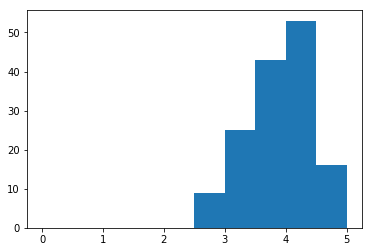

In [69]:
fig, ax = plt.subplots()
ax.hist(norm_reviews['Fandango_Ratingvalue'], range=(0, 5))
plt.show()

## 5: Comparing Histograms

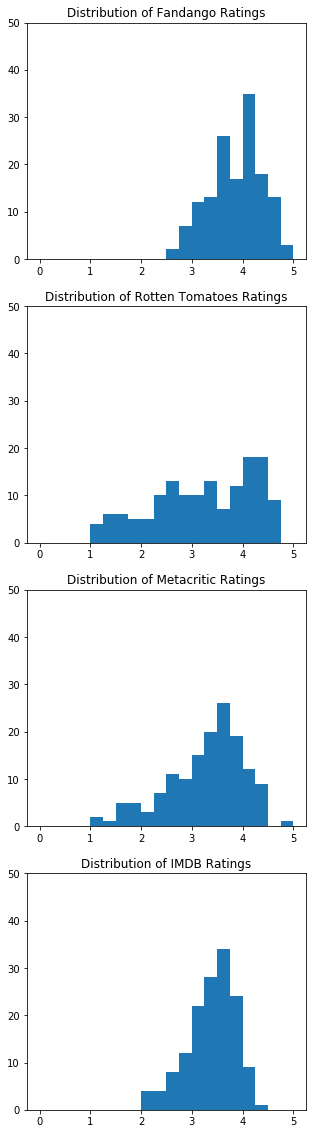

In [70]:
fig = plt.figure(figsize=(5,20))

ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.hist(norm_reviews['Fandango_Ratingvalue'], bins=20, range=(0, 5))
ax1.set_title('Distribution of Fandango Ratings')
ax1.set_ylim(0, 50)

ax2.hist(norm_reviews['RT_user_norm'], 20, range=(0, 5))
ax2.set_title('Distribution of Rotten Tomatoes Ratings')
ax2.set_ylim(0, 50)

ax3.hist(norm_reviews['Metacritic_user_nom'], 20, range=(0, 5))
ax3.set_title('Distribution of Metacritic Ratings')
ax3.set_ylim(0, 50)

ax4.hist(norm_reviews['IMDB_norm'], 20, range=(0, 5))
ax4.set_title('Distribution of IMDB Ratings')
ax4.set_ylim(0, 50)

plt.show()

## 7: Box Plot

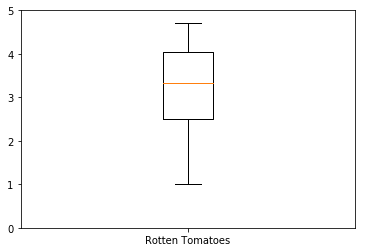

In [71]:
fig, ax = plt.subplots()
ax.boxplot(norm_reviews['RT_user_norm'])
ax.set_xticklabels(['Rotten Tomatoes'])
ax.set_ylim(0, 5)
plt.show()

## 8: Multiple Box Plots

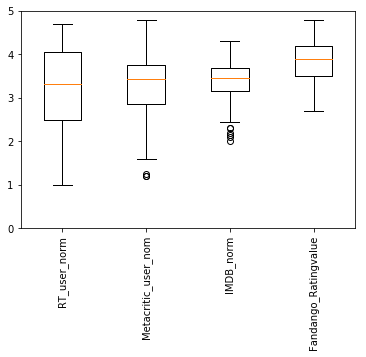

In [72]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']
fig, ax = plt.subplots()
ax.boxplot(norm_reviews[num_cols].values)
ax.set_xticklabels(num_cols, rotation=90)
ax.set_ylim(0,5)
plt.show()